<a href="https://colab.research.google.com/github/alathiya/MNIST-trained-using-Tensorflow/blob/master/MNIST_trained_using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MSNIT Implementation in Tensorflow

- Model trained on 60,000 images and evaluated test accuracy on 10,000 images
- Callback used to stop training when train accuracy >= 0.99
- Test accuracy evaluated 
- Prediction on test images and compared to ground truth

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [0]:
# Normalize training dataset and Test dataset
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
# Define model with callback
class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.99):
      print("\n Reached 99% accuracy on train data so cancelling training!")
      self.model.stop_training = True

callbacks = mycallback()

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [5]:
# train model and stop when train accu is greated than or equal to 99%
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
60000/60000 [==============================] - 10s 175us/sample - loss: 0.1970 - acc: 0.9420
Epoch 2/10
60000/60000 [==============================] - 10s 169us/sample - loss: 0.0801 - acc: 0.9754
Epoch 3/10
60000/60000 [==============================] - 10s 168us/sample - loss: 0.0514 - acc: 0.9836
Epoch 4/10
60000/60000 [==============================] - 10s 160us/sample - loss: 0.0379 - acc: 0.9877
Epoch 5/10
59936/60000 [============================>.] - ETA: 0s - loss: 0.0263 - acc: 0.9917
 Reached 99% accuracy on train data so cancelling training!
60000/60000 [==============================] - 10s 162us/sample - loss: 0.0263 - acc: 0.9917


In [6]:
# evaluate accuracy on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print("\nTest Accuracy = {}".format(test_acc))

10000/10000 [==============================] - 1s 60us/sample - loss: 0.0697 - acc: 0.9798

Test Accuracy = 0.9797999858856201



Ground Truth:1

 Prediction probablity of image:0.9997000098228455


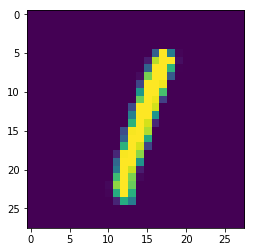

In [28]:
# predict on sample test images
import numpy as np
import matplotlib as plt

test_img = np.expand_dims(x_test[5], axis=0)
prediction = model.predict(test_img)
plt.pyplot.imshow(x_test[5])
print("\nGround Truth:{}".format(y_test[5]))
print("\n Prediction probablity of image:{}".format(round(np.max(prediction),4)))